In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('heart.csv')
X = df.drop('target', axis=1)
df.head()
df.info()
print(df.isnull().sum())
df_cleaned = df.dropna()
print(f"\nOriginal rows: {len(df)}, Rows after dropping NaN: {len(df_cleaned)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Origin

In [14]:
df = df_cleaned

In [15]:
# Select Features (X) and Target (y)
X_lin = df[['age']]  # Note: X must be a 2D array/DataFrame
y_lin = df['thalach']

# Split the data (80% training, 20% testing)
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

print(f"\nLinear Regression Training Set Size: {len(X_train_lin)}")
print(f"Linear Regression Testing Set Size: {len(X_test_lin)}")


Linear Regression Training Set Size: 820
Linear Regression Testing Set Size: 205


In [16]:
# Create and train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_lin, y_train_lin)

# Make predictions on the test set
y_pred_lin = lin_reg.predict(X_test_lin)

print(f"Linear Regression Model Trained. Intercept: {lin_reg.intercept_:.2f}, Coefficient (age): {lin_reg.coef_[0]:.2f}")

Linear Regression Model Trained. Intercept: 202.34, Coefficient (age): -0.97


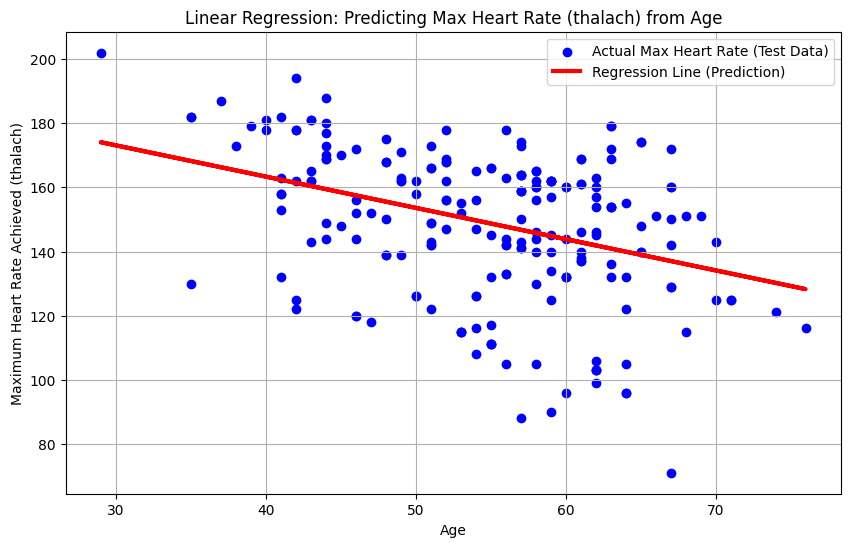

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot of test data
plt.scatter(X_test_lin, y_test_lin, color='blue', label='Actual Max Heart Rate (Test Data)')

# Plot the regression line
plt.plot(X_test_lin, y_pred_lin, color='green',linewidth=3, label='Regression Line (Prediction)')

plt.title('Linear Regression: Predicting Max Heart Rate (thalach) from Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (thalach)')
plt.legend()
plt.grid(True)
plt.show()